## Apparent temperature Prediction using Weather variables

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.graph_objs as go
import plotly.offline as py
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
import os

In [14]:
df=pd.read_csv("C:/Users/saiki/OneDrive/Desktop/Data Science/Machine Learning/weather_data.csv")

In [15]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
5994,2006-05-15 19:00:00.000 +0200,Partly Cloudy,rain,19.094444,19.094444,0.60,6.9391,350,11.2056,0,1020.07,Partly cloudy until night.
5995,2006-05-15 20:00:00.000 +0200,Partly Cloudy,rain,17.655556,17.655556,0.62,1.6100,56,10.3523,0,1020.44,Partly cloudy until night.
5996,2006-05-15 21:00:00.000 +0200,Partly Cloudy,rain,15.072222,15.072222,0.78,1.9481,170,9.9820,0,1020.99,Partly cloudy until night.
5997,2006-05-15 22:00:00.000 +0200,Partly Cloudy,rain,13.405556,13.405556,0.83,3.1073,201,15.8263,0,1021.50,Partly cloudy until night.


In [16]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            5999 non-null   object 
 1   Summary                   5999 non-null   object 
 2   Precip Type               5999 non-null   object 
 3   Temperature (C)           5999 non-null   float64
 4   Apparent Temperature (C)  5999 non-null   float64
 5   Humidity                  5999 non-null   float64
 6   Wind Speed (km/h)         5999 non-null   float64
 7   Wind Bearing (degrees)    5999 non-null   int64  
 8   Visibility (km)           5999 non-null   float64
 9   Loud Cover                5999 non-null   int64  
 10  Pressure (millibars)      5999 non-null   float64
 11  Daily Summary             5999 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [18]:
df.drop(['Formatted Date','Daily Summary','Loud Cover'],axis=1,inplace=True)

In [19]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51


In [20]:
df.isnull().sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

In [21]:
df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy'], dtype=object)

In [22]:
df.value_counts().sum()

5999

In [23]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000
mean,10.217695,8.958658,0.779488,10.007362,190.349558,9.476875,997.359828
std,10.565425,11.923712,0.173051,6.536619,107.026792,4.038583,145.173638
min,-14.088889,-22.094444,0.270000,0.000000,0.000000,0.000000,0.000000
25%,1.094444,-1.538889,0.680000,4.878300,122.000000,6.906900,1012.060000
50%,10.050000,10.050000,0.830000,9.064300,190.000000,9.982000,1016.840000
75%,18.722222,18.722222,0.920000,13.395200,287.000000,11.270000,1022.490000
max,34.005556,36.400000,1.000000,45.933300,359.000000,16.100000,1045.140000


In [26]:
import seaborn as sns

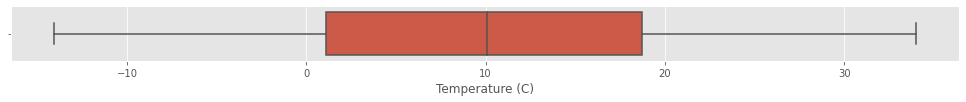

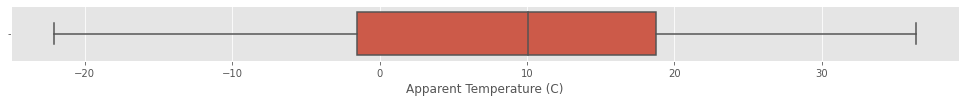

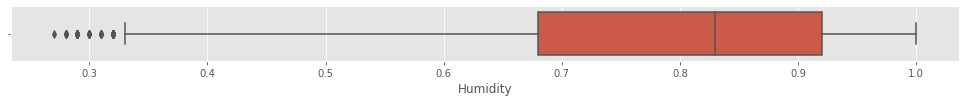

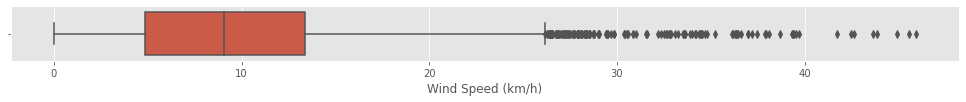

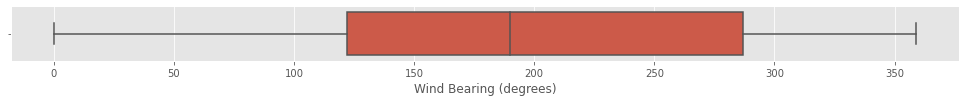

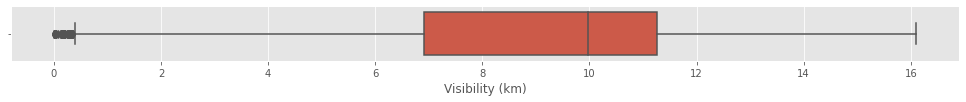

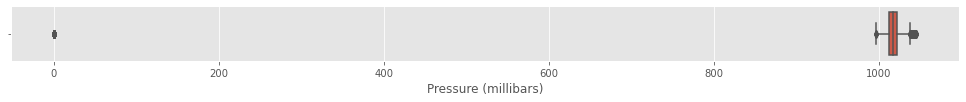

In [27]:
df1=df.select_dtypes(exclude=['object'])

for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)

<AxesSubplot:>

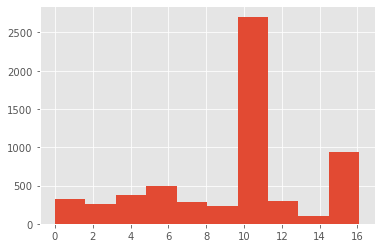

In [28]:
df1["Visibility (km)"].hist()

array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Apparent Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Wind Bearing (degrees)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>],
       [<AxesSubplot:title={'center':'Pressure (millibars)'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

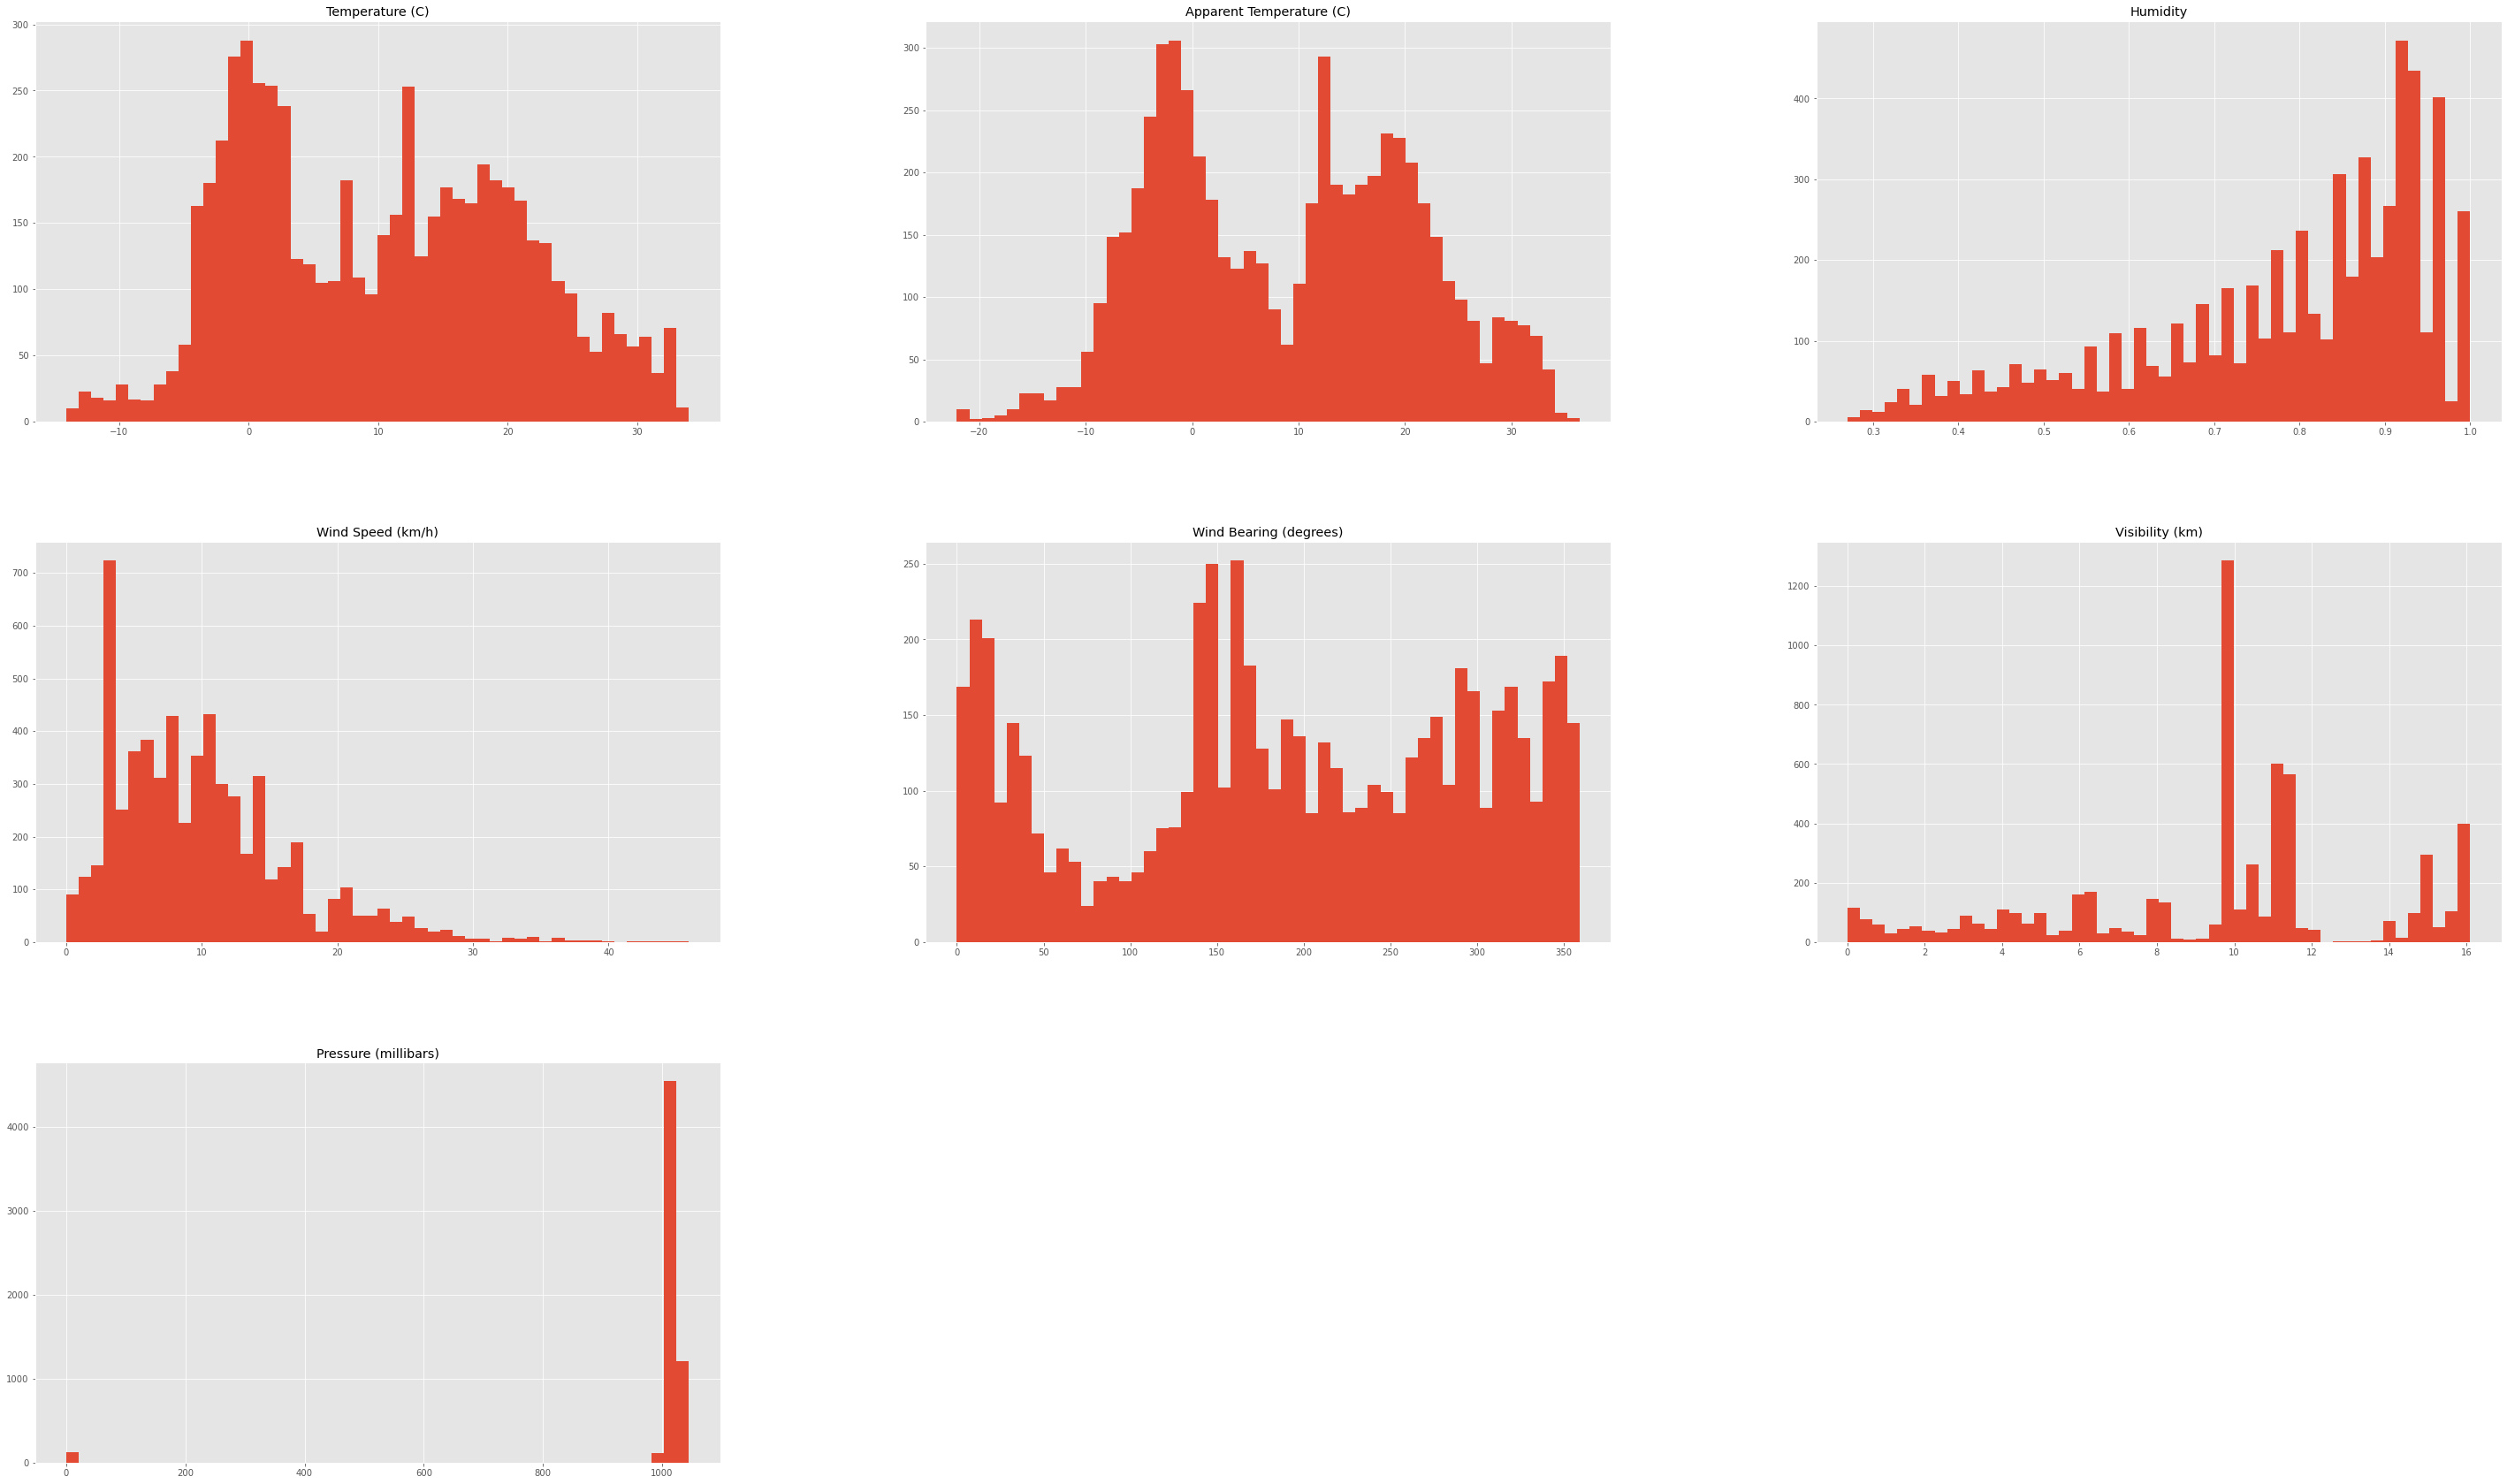

In [37]:
df1.hist(bins=50 , figsize=(50,30))